In [1]:
# import necessary packages
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from scipy import stats
import numpy as np

In [2]:
# Loading & Preprocessing Data
df = pd.read_csv("C:/Users/mitra/Downloads/202302-citibike-tripdata_1.csv", 
                 dtype={'start_station_name': str, 'end_station_name': str}, low_memory=False)

# drop unnecessary columns
df = df.drop(["ride_id", "start_station_name", "start_station_id", "end_station_name", "end_station_id", ], axis=1)
# drop null values
df.dropna(inplace=True)

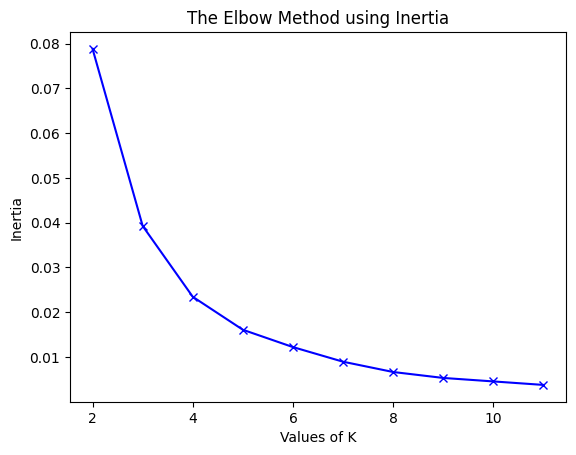

In [8]:
# form clusters based on geolocation

# remove outliers 
z1 = np.abs(stats.zscore(df['start_lat']))
threshold = 3
outliers = df[z1 > threshold]
df = df.drop(outliers.index)
z2 = np.abs(stats.zscore(df['start_lng']))
outliers = df[z2 > threshold]
df = df.drop(outliers.index)

X = df[["start_lat", "start_lng"]]
X_norm = preprocessing.normalize(X)

# find the best # of clusters => elbow method
K = range(2, 12)
inertias = []
for k in range(2, 12):
    kmeanModel = KMeans(n_clusters=k, init='k-means++', n_init="auto").fit(X_norm)
    kmeanModel.fit(X_norm)
    inertias.append(kmeanModel.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

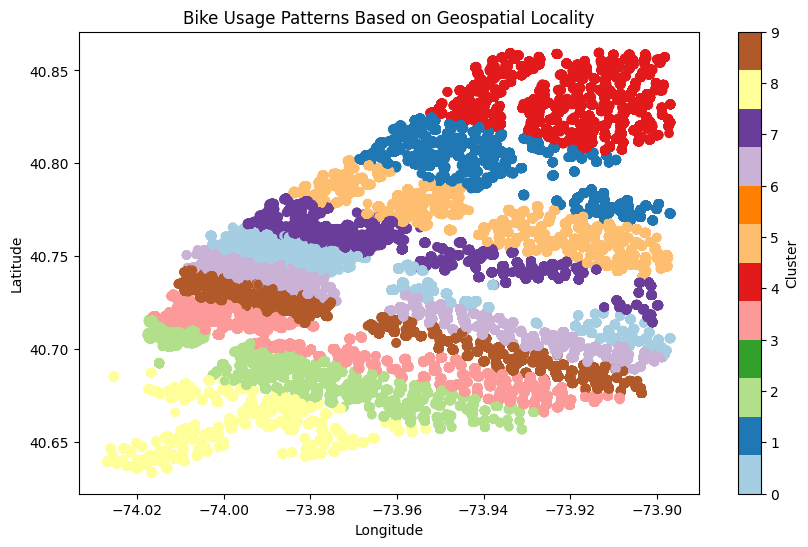

In [10]:
# organize and plot the data into geospatial clusters
kmeans = KMeans(n_clusters = 10, random_state = 0, n_init='auto')
kmeans.fit(X_norm)

df["cluster"] = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(df['start_lng'], df['start_lat'], c=df['cluster'], cmap='Paired')
plt.title('Bike Usage Patterns Based on Geospatial Locality')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


<Axes: ylabel='rideable_type'>

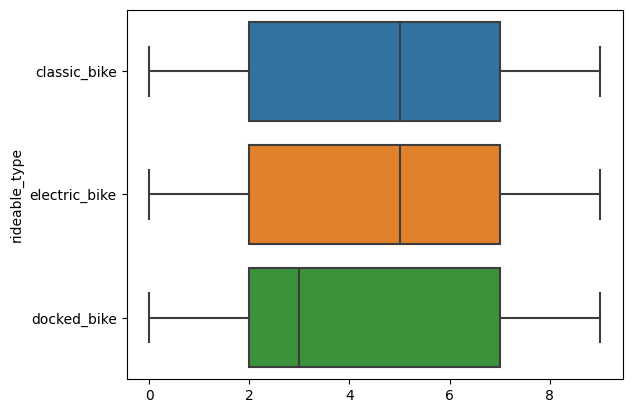

In [11]:
sns.boxplot(x = kmeans.labels_, y = df["rideable_type"])

In this boxplot, I have identified key disparities in bike type availability across different geospatial clusters. Notably, 75% of the classic, electric, and docked bike rides are concentrated within clusters 2-6. Moreover, 25% of lower of all the bike rides were located in geospatial clusters 0, 1, and 8. In particular, while the median of total bike rides in classic and electric lands at cluster 5, the median of dock bike rides lands at cluster 3. This suggests a notable disadvantage for clusters 0, 1, and 8 in terms of bike sharing accessibility. This indicates that these clusters have a significant gap in bike-sharing services and access compared to geospatial clusters surrounding it. 

The lack of uniform access to bike-sharing services largely contributes to the increased traffic congestion and pollution in these geospatial clusters, as fewer residents have access to convenient cycling options. This is particularly concerning in a bustling city like NYC, where reducing carbon emissions is crucial for environmental sustainability.

In general, scientific research has proven that riding a bike emits much less carbon emissions than driving a car on your way to work. In fact, many studies have used NYC's bike-sharing system to illustrate this point. Specifically, dock bike sharing systems make bikes more accessible to the public, thereby encouraging more people to cycle for their commute rather than drive. Addressing these gaps is vital for promoting cycling as a sustainable commute option, reducing traffic congestion, and lowering the city's carbon footprint. The targeted expansion of bike-sharing systems in geospatial clusters 0, 1, and 8 would not only improve urban mobility but also contribute significantly to the city's sustainability goals. 

https://www.axios.com/2021/10/06/bike-sharing-citibike-new-york-climate-change

<Axes: ylabel='member_casual'>

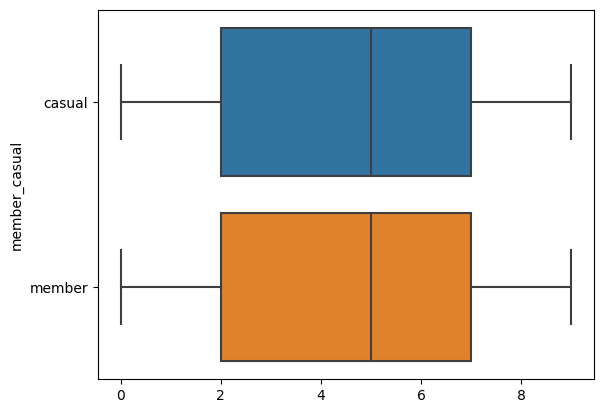

In [12]:
sns.boxplot(x = kmeans.labels_, y = df["member_casual"])

In this boxplot, I further explored NYC's bike-sharing usage patterns focused on the relationship between riders' membership status (casual or member) and their distribution across identified geospatial clusters. There was a consistent pattern for both casual and member riders, with the 25th percentile beginning at cluster 2 and extending to the 75th percentile at cluster 7, with the median positioned at cluster 5 for both groups. This distribution suggests a uniformity in the usage of bike-sharing services across different types of riders throughout clusters 2-7. 

In geospatial clusters 0, 1, and 8, there needs to efforts put into increased membership conversion. Presumably, members are more likely to make use of the bike-sharing system frequently rather than a casual rider. Having more people in these geospatial clusters be members of the bike-sharing system would not only reduce the overall carbon emissions of the city, but would also reduce traffic congestion. 

In order to have more memership conversion, the NYC government should attempts to execute target marketing, or add loyalty programs and memership benefits to the bike-sharing system to incentivize more people to become frequent bike riders. 

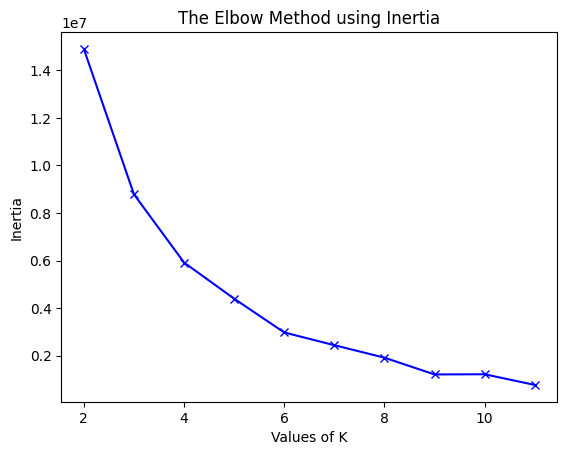

In [13]:
# sort data into starting and ending time clusters
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['start_hour'] = df['started_at'].dt.hour
df['end_hour'] = df['ended_at'].dt.hour

# remove the outliers
z1 = np.abs(stats.zscore(df['start_hour']))
threshold = 3
outliers = df[z1 > threshold]
df = df.drop(outliers.index)
z2 = np.abs(stats.zscore(df['end_hour']))
outliers = df[z2 > threshold]
df = df.drop(outliers.index)

X = df[["start_hour", "end_hour"]]
# find the best # of clusters => elbow method
K = range(2, 12)
inertias = []
for k in range(2, 12):
    kmeanModel = KMeans(n_clusters=k, init='k-means++', n_init="auto").fit(X)
    inertias.append(kmeanModel.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

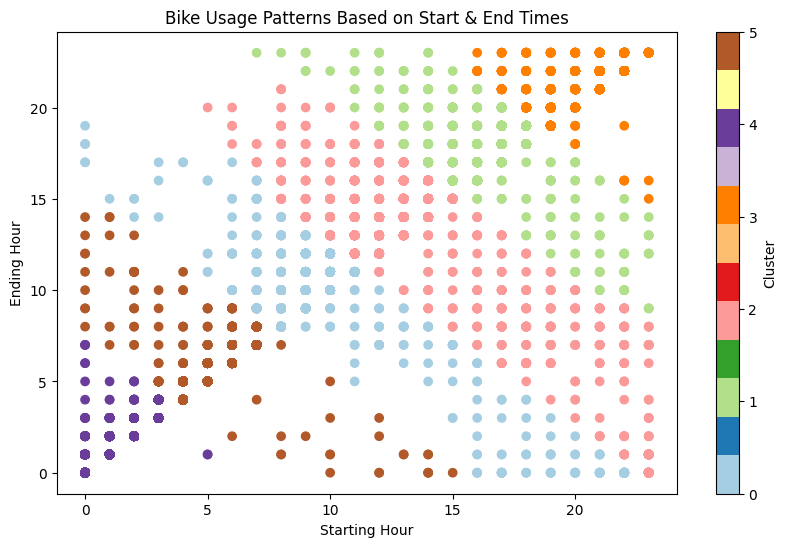

In [16]:
# plot and organize data based on start and end time clusters
kmeans = KMeans(n_clusters = 6, random_state = 0, n_init='auto')
kmeans.fit(X)

df["cluster"] = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(df['start_hour'], df['end_hour'], c=df['cluster'], cmap='Paired')
plt.title('Bike Usage Patterns Based on Start & End Times')
plt.xlabel('Starting Hour')
plt.ylabel('Ending Hour')
plt.colorbar(label='Cluster')
plt.show()

<Axes: ylabel='rideable_type'>

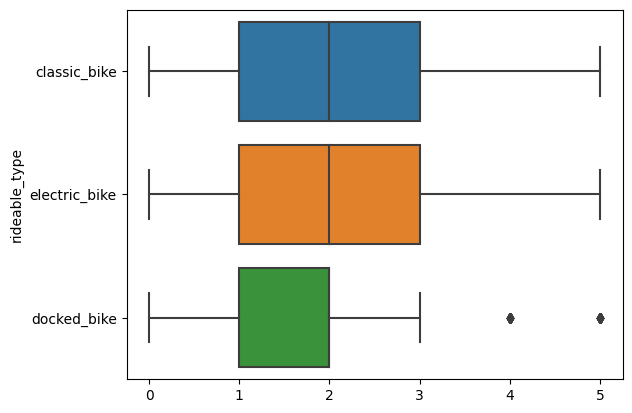

In [17]:
sns.boxplot(x = kmeans.labels_, y = df["rideable_type"])

Delving deeper into the dataset from NYC's bike-share system, I conducted an analysis that segmented the data into clusters based on the starting and ending times of rides. This analysis was visualized using a boxplot, which compared these time-based clusters against the types of bike rides utilized: classic, electric, and docked. For classic and electric bike rides, the lower quartile (25%) fell within cluster 1, while the upper quartile (75%) extended to cluster 3. Conversely, docked bike rides showed a lower quartile beginning at cluster 1 and an upper quartile reaching cluster 2. 

The narrower temporal distribution for docked bikes could indicate that it is favored for commutes or activities with more defined time frames, such as work or school commutes. In contrast, the broader distribution observed for classic and electric bikes suggests they may be used more flexibly, catering to a wider range of activities, possibly including leisure or errands that do not adhere to strict timing.

<Axes: ylabel='member_casual'>

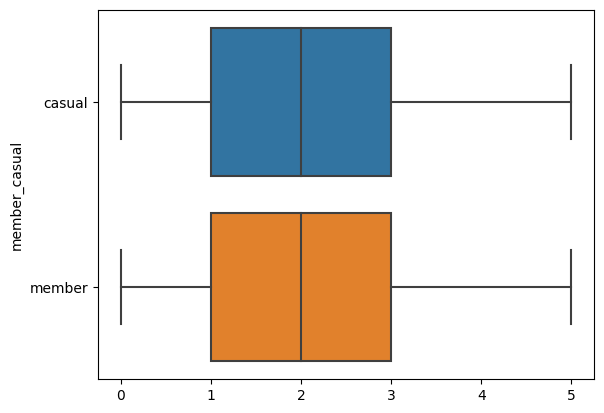

In [18]:
sns.boxplot(x = kmeans.labels_, y = df["member_casual"])

I conducted a detailed examination of the NYC bike-share system dataset, specifically focusing on how the starting and ending times of rides grouped into clusters relate to the type of bike riders: members or casual. Through a boxplot analysis that aligned these time clusters with rider types, I discovered a pattern where both casual and member riders predominantly fell within the same clusters. Specifically, the lower quartile (25%) of both casual and member rides started in cluster 1, while the upper quartile (75%) reached up to cluster 3, out of a total of six clusters. This analysis sheds light on the temporal behavior and preferences of bike-share users, regardless of their membership status.

This leads us to deducing that frequent users of the bike-sharing system (members) or lenient users (casual) end up using the bikes at around the same time in the day. 